In [1]:
from util.util import *
from transformers import BertTokenizer
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [2]:
import matplotlib.pyplot as plt

In [3]:
filename = "/data/medg/misc/phuongpm/squadv2/"

In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [5]:
traindata = load_json(filename + "train-v2.0.json")

In [6]:
devdata = load_json(filename + "dev-v2.0.json")

In [11]:
traindata['data'][3]['paragraphs'][1]['qas']

[{'question': 'In addition to playing music, what other function can the iPod perform?',
  'id': '56cc55fa6d243a140015ef14',
  'answers': [{'text': 'data storage', 'answer_start': 62}],
  'is_impossible': False},
 {'question': 'What is the smallest data capacity for an iPod product?',
  'id': '56cc55fa6d243a140015ef15',
  'answers': [{'text': '2 GB', 'answer_start': 131}],
  'is_impossible': False},
 {'question': 'What is the largest data capacity for an iPod product?',
  'id': '56cc55fa6d243a140015ef16',
  'answers': [{'text': '128 GB', 'answer_start': 160}],
  'is_impossible': False},
 {'question': 'Which iPod product features the smallest data storage capacity?',
  'id': '56cc55fa6d243a140015ef17',
  'answers': [{'text': 'iPod Shuffle', 'answer_start': 144}],
  'is_impossible': False},
 {'question': 'Which current iPod product features the largest data storage capacity?',
  'id': '56cc55fa6d243a140015ef18',
  'answers': [{'text': 'iPod Touch', 'answer_start': 175}],
  'is_impossible

In [12]:
lenps = []
lenqs = []
lenas = []

for ds in [traindata, devdata]:
    for datum in tqdm(ds['data']):
        for para in datum['paragraphs']:
            context = para['context']
            lenps.append(len(tokenizer.tokenize(context)))
            for qa in para['qas']:
                q = qa['question']
                lenqs.append(len(tokenizer.tokenize(q)))
                if not qa['is_impossible']:
                    a = qa['answers'][0]['text']
                    lenas.append(len(tokenizer.tokenize(a)))
                
        

100%|██████████| 35/35 [00:06<00:00,  5.68it/s]


In [17]:
print(len(lenas)/len(lenqs))

0.6522800157533476


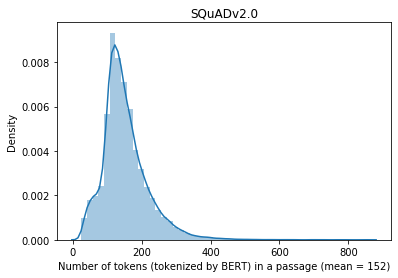

In [14]:
sns.distplot(lenps)
plt.xlabel('Number of tokens (tokenized by BERT) in a passage (mean = %d)' % np.mean(lenps))
plt.ylabel('Density')
plt.title('SQuADv2.0')
plt.show()

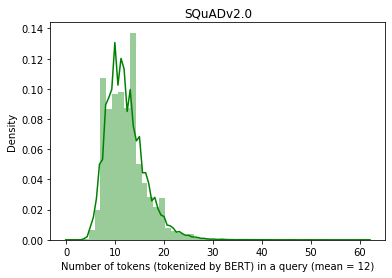

In [15]:
sns.distplot(lenqs, color = 'green')
plt.xlabel('Number of tokens (tokenized by BERT) in a query (mean = %d)' % np.mean(lenqs))
plt.ylabel('Density')
plt.title('SQuADv2.0')
plt.show()

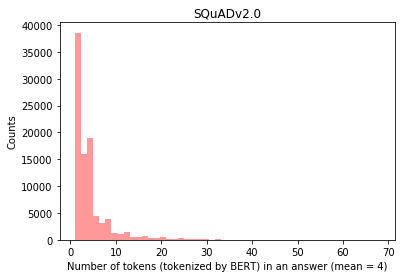

In [16]:
sns.distplot(lenas, color = 'red', kde = False)
plt.xlabel('Number of tokens (tokenized by BERT) in an answer (mean = %d)' % np.mean(lenas))
plt.ylabel('Counts')
plt.title('SQuADv2.0')
plt.show()